# MNIST

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import os
import seaborn as sns
import glob
import natsort

In [2]:
import seaborn as sns
import copy

def load_data():
    datas = list()
    save_path = "../Output/CIFAR10-*B0-D0*-N100-P0.01*/s[1-9].csv"
    path_list = glob.glob(save_path)
    data_temp = get_concat_glob(path_list)
    data_temp["a1"] = data_temp["a1"] * 100
    data_temp["a3"] = data_temp["a3"] * 100
    data_temp['Distribution'] = data_temp['distribution'] .map({0: "Balanced IID partition", 
                                                0.3: "Balanced Dirichlet partition (α=0.3)", 
                                                })
    # print(data_temp.size)
    return data_temp

In [3]:
def get_concat(foldername, seeds):
    for i, seed in enumerate(seeds):
        if i == 0: data = pd.read_csv(os.path.join(save_path,foldername,"s{}.csv".format(seed)))
        else: 
            try: 
                data = pd.concat([data, pd.read_csv(os.path.join(save_path,foldername,"s{}.csv".format(seed)))])
            except:
                pass
    # print(foldername, len(data))
    return data

def get_concat_glob(paths):
    data_ = []
    for i, path in enumerate(paths):
        data = pd.read_csv(path)
        data["Mode"] = data["mode"]

        if "Mean1" in path:
            data["Mode"] += "Mean1"
            continue
        elif "Mean2" in path:
            data["Mode"] += "Mean2"
            continue
        elif "Mean3" in path:
            data["Mode"] += "Mean3"
            continue
        elif "Mean4" in path:
            data["Mode"] += "Mean4"
            continue
        elif "Mean5" in path:
            data["Mode"] += "Mean5"
        elif "Mean6" in path:
            data["Mode"] += "Mean6"
            continue
        elif "LogitNorm_BNinit0" in path:
            data["Mode"] += "LogitNorm+BN"
            continue
        elif "BN00+G00" in path:
            data["Mode"] += "_BN00"
            continue
        elif "BN00+G01" in path:
            data["Mode"] += "_BN01"
            continue
        elif "BNinit0" in path:
            data["Mode"] += "BNinit0"
            continue
        elif "fc" in path:
            continue
        elif "ec" in path:
            continue

        if "Mean5-LR" in path and "G25" in path:
            data["Mode"] += "_G2_LR" + path.split("LR")[1].split("/")[0]
            continue

        if "Mean5_ortho1_svm1-LR" in path and "G05" in path:
            data["Mode"] += "_o1_sv"
        elif "Mean5_ortho1-LR" in path and "G05" in path:
            data["Mode"] += "_o1"
        elif "Mean5_ortho2-LR" in path and "G05" in path:
            data["Mode"] += "_o2"
        elif "Mean5_ortho3-LR0.1" in path and "G05" in path:
            data["Mode"] += "_o3"
        elif "Mean5_ortho4-LR0.1" in path and "G05" in path:
            data["Mode"] += "_o4"
        elif "Mean5_ortho5-LR0.1" in path and "G05" in path:
            data["Mode"] += "_o5"
        elif "Mean5_ortho6-LR0.1" in path and "G05" in path:
            data["Mode"] += "_o6"


        if "Mean5-LR0.3" in path and "G05" in path:
            data["Mode"] += "_G05_LR0.3"
            continue
        elif "Mean5-LR0.05" in path and "G05" in path:
            data["Mode"] += "_G05_LR0.05"
            continue
        elif "Mean5-LR2.0" in path and "G15" in path:
            data["Mode"] += "_G15_LR2.0"
            continue
        elif "Mean5-LR3.0" in path and "G15" in path:
            data["Mode"] += "_G15_LR3.0"
            continue
        elif "Mean5-LR0.8" in path and "G15" in path:
            data["Mode"] += "_G15_LR0.8"
        elif "Mean5-LR1.0" in path and "G15" in path:
            data["Mode"] += "_G15_LR1.0"
            continue
        

        if "_PCOS1" in path and "G05":
            data["Mode"] += "_PCOS"

        if "__PCOS1/" in path and "G05":
            data["Mode"] += "_PCOS1"
            # continue        
        if "PCOS1_Mean5-LR0.1-SWA1" in path and "G05":
            data["Mode"] += "_PCOS1-SWA"
            continue
        elif "PCOS1_Mean5-LR1.0-SWA1" in path and "G15":
            data["Mode"] += "_PCOS1-SWA"
            continue
        elif "PCOS1_Mean5-LR0.1" in path and "G05" in path and "PCOS1" in path:
            data["Mode"] += "_PCOS1"
        elif "PCOS1_Mean5-LR1.0" in path and "G15" in path and "PCOS1" in path:
            data["Mode"] += "_PCOS1"
            continue
        elif "PCOS1_Mean5-LR2.0" in path and "G15" in path and "PCOS1" in path:
            data["Mode"] += "_PCOS1"
            continue


        if "GNStopEP20" in path:
            data["Mode"] += "_EP20"
            continue
        elif "GNStopEP50" in path:
            data["Mode"] += "_EP50"
            continue
        elif "GNStopEP100" in path:
            data["Mode"] += "_EP100"
            continue
        elif "Mean5-LR1.2" in path:
            data["Mode"] += "_G15_LR1.2"
            continue
        elif "Mean5_EPS0.1-LR1.2" in path:
            data["Mode"] += "_G15_EP0.1"
            continue
        elif "Mean5_EPS1.0-LR1.2" in path:
            data["Mode"] += "_G15_EP1.0"
            continue

        if "G15" in path and "PCOS" in path:
            continue
        if "G15" in path:
            continue

        if len(data_) == 0: 
            # print(path)
            data_ = data
        else: 
            print(path)
            data_ = pd.concat([data_, data])
    return data_

../Output/CIFAR10-fedavg-G05-B0-D0-N100-P0.01__Mean5_PCOS1_ortho1-LR0.1/s1.csv
../Output/CIFAR10-fedavg-G05-B0-D0-N100-P0.01__Mean5_PCOS1_ortho1-LR0.1/s2.csv
../Output/CIFAR10-fedavg-G05-B0-D0-N100-P0.01__Mean5_PCOS1_ortho1-LR0.1/s3.csv
../Output/CIFAR10-fedavg-G00-B0-D0-N100-P0.01/s1.csv
../Output/CIFAR10-fedavg-G00-B0-D0-N100-P0.01/s2.csv
../Output/CIFAR10-fedavg-G00-B0-D0-N100-P0.01/s3.csv
../Output/CIFAR10-fedavg-G05-B0-D0.3-N100-P0.01__Mean5_ortho1-LR0.1/s4.csv
../Output/CIFAR10-fedavg-G05-B0-D0.3-N100-P0.01__Mean5_ortho1-LR0.1/s1.csv
../Output/CIFAR10-fedavg-G05-B0-D0.3-N100-P0.01__Mean5_ortho1-LR0.1/s2.csv
../Output/CIFAR10-fedavg-G05-B0-D0.3-N100-P0.01__Mean5_ortho1-LR0.1/s3.csv
../Output/CIFAR10-fedavg-G00-B0-D0.3-N100-P0.01/s1.csv
../Output/CIFAR10-fedavg-G00-B0-D0.3-N100-P0.01/s2.csv
../Output/CIFAR10-fedavg-G00-B0-D0.3-N100-P0.01/s3.csv
../Output/CIFAR10-fedavg-G05-B0-D0.3-N100-P0.01__Mean5_PCOS1_ortho1-LR0.1/s4.csv
../Output/CIFAR10-fedavg-G05-B0-D0.3-N100-P0.01__Mean5_PCO

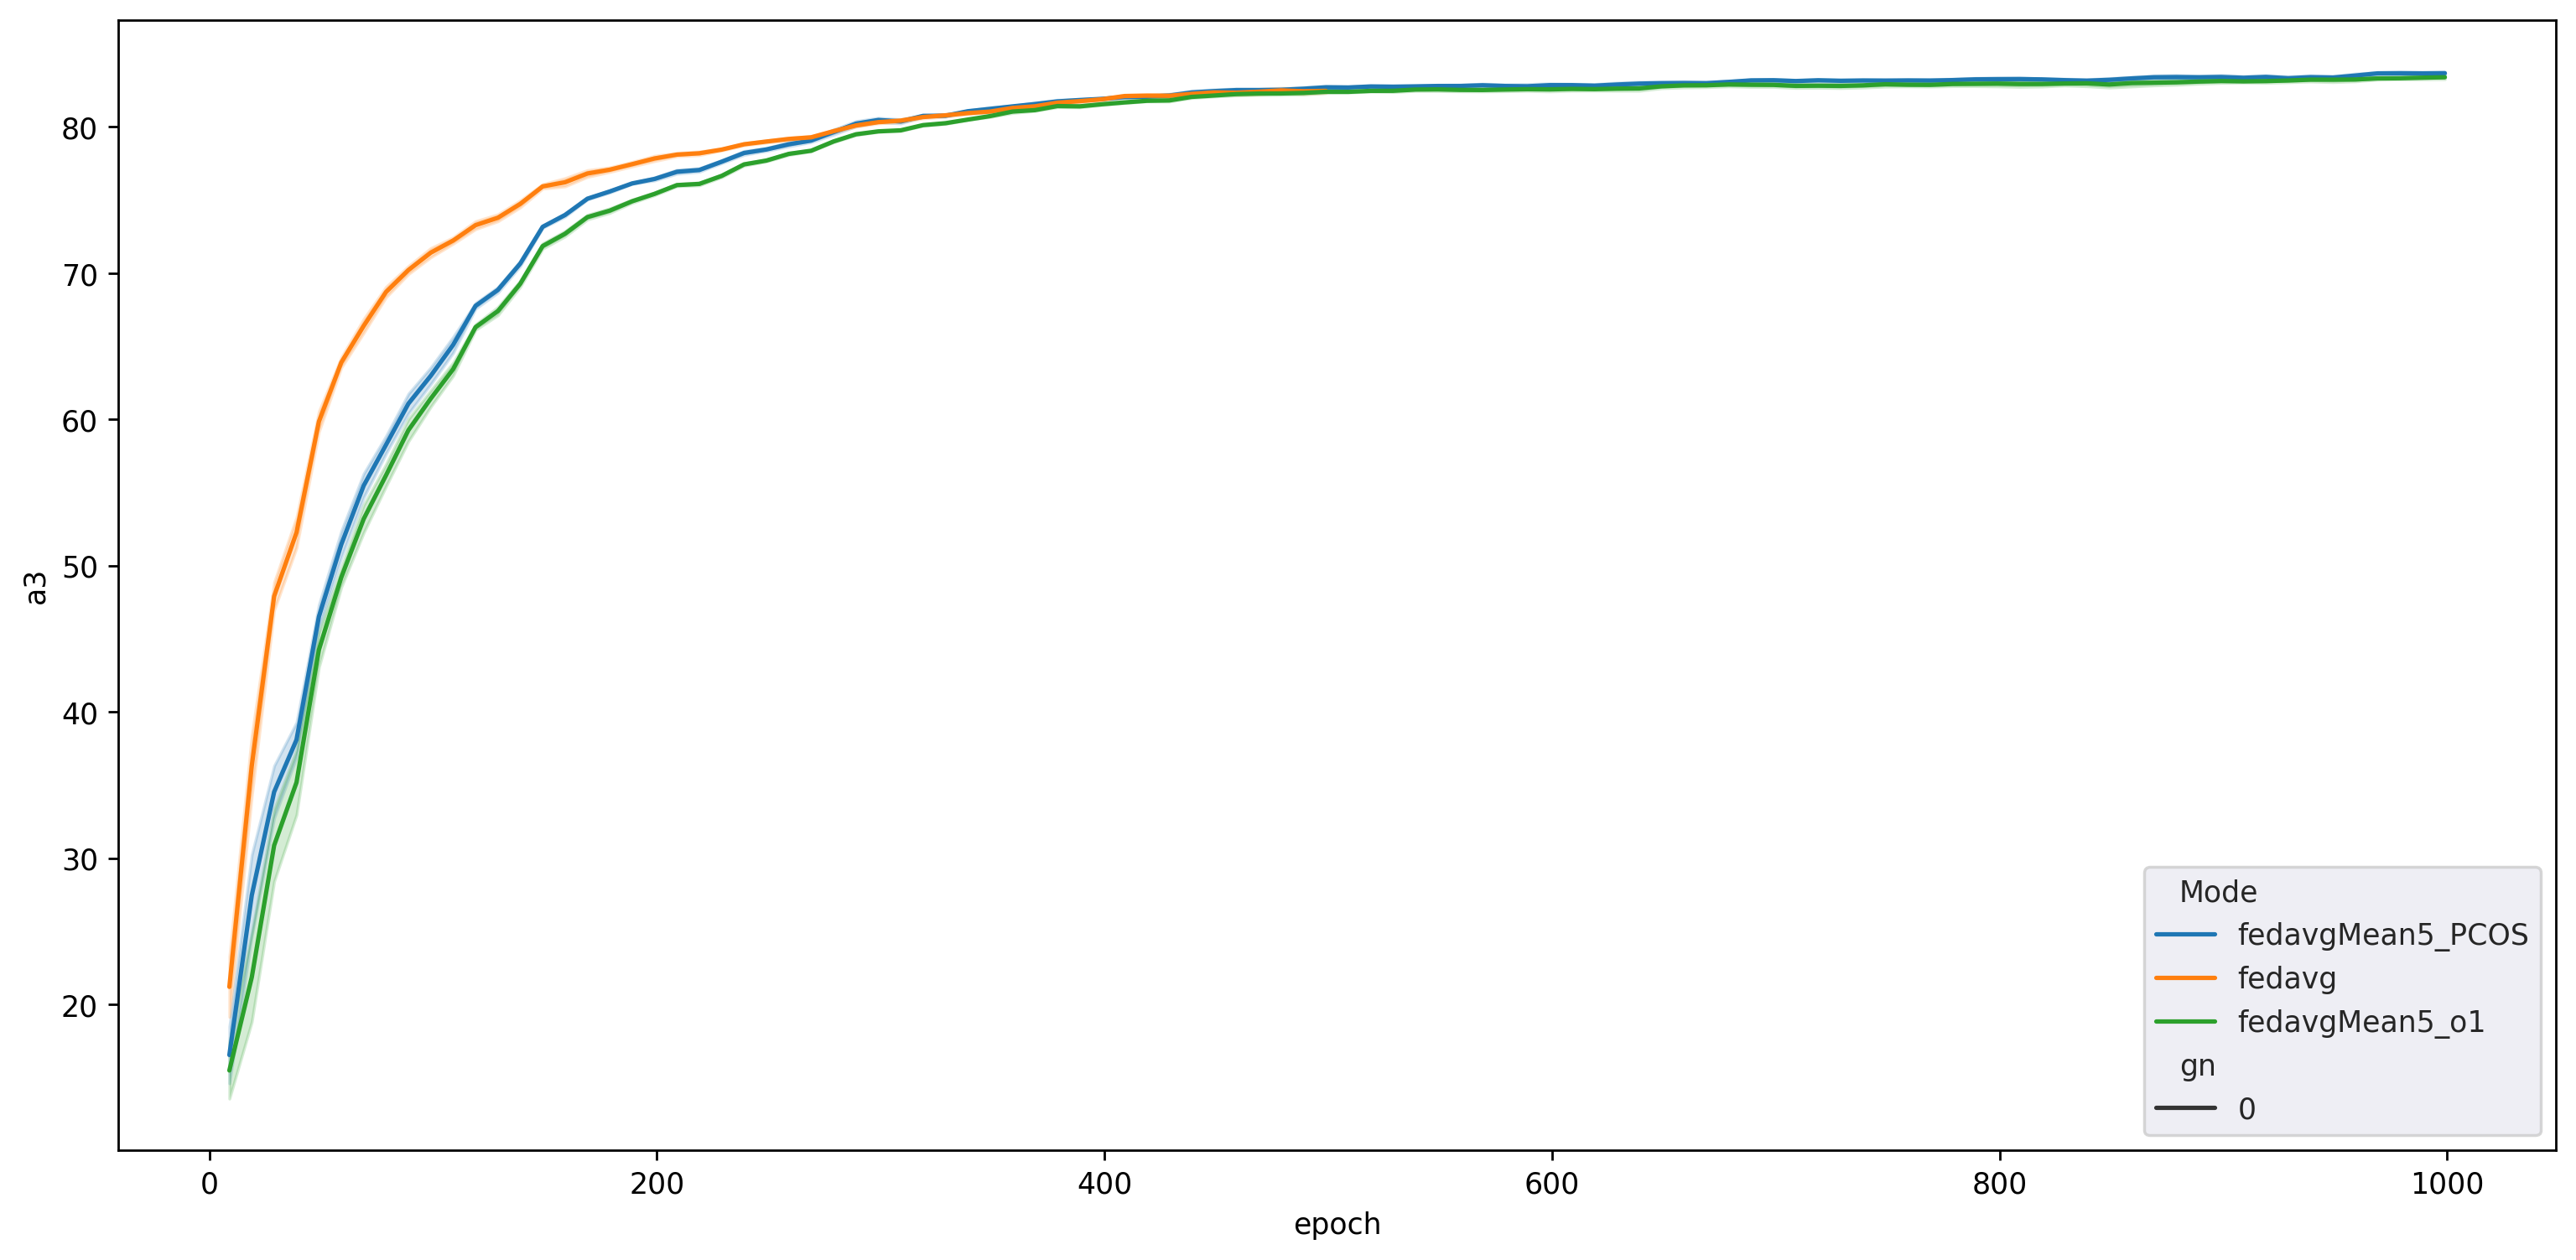

In [4]:
data_temp = load_data()

fig, axes = plt.subplots(1, 1, figsize=(15,7), dpi=250, sharey=False)
sns.set_style("darkgrid")

for ax, ap, lr in zip([axes], [0.01], [1.2]):
    temp = copy.deepcopy(data_temp)
    temp = temp[temp["act_prob"] == ap]
    # temp = temp[(temp["Mode"] != "fedprox") & (temp["Mode"] != "scaffold") & (temp["Mode"] != "feddynMean5") & (temp["Mode"] != "fedproxMean5")]
    # temp = temp[(temp["Mode"] != "feddyn") & (temp["Mode"] != "fedavg") & (temp["Mode"] != "fedavg_PCOS1") & (temp["Mode"] != "fedproxMean5")]
    temp = temp[(temp["Distribution"] == "Balanced IID partition")]
    ax = sns.lineplot(data=temp, x="epoch", y="a3", hue="Mode", style="gn", ax=ax, errorbar="se")
    # ax.set_ylim([30,60])

../Output/CIFAR10-fedavg-G05-B0-D0-N100-P0.01__Mean5_PCOS1_ortho1-LR0.1/s1.csv
../Output/CIFAR10-fedavg-G05-B0-D0-N100-P0.01__Mean5_PCOS1_ortho1-LR0.1/s2.csv
../Output/CIFAR10-fedavg-G05-B0-D0-N100-P0.01__Mean5_PCOS1_ortho1-LR0.1/s3.csv
../Output/CIFAR10-fedavg-G00-B0-D0-N100-P0.01/s1.csv
../Output/CIFAR10-fedavg-G00-B0-D0-N100-P0.01/s2.csv
../Output/CIFAR10-fedavg-G00-B0-D0-N100-P0.01/s3.csv
../Output/CIFAR10-fedavg-G05-B0-D0.3-N100-P0.01__Mean5_ortho1-LR0.1/s4.csv
../Output/CIFAR10-fedavg-G05-B0-D0.3-N100-P0.01__Mean5_ortho1-LR0.1/s1.csv
../Output/CIFAR10-fedavg-G05-B0-D0.3-N100-P0.01__Mean5_ortho1-LR0.1/s2.csv
../Output/CIFAR10-fedavg-G05-B0-D0.3-N100-P0.01__Mean5_ortho1-LR0.1/s3.csv
../Output/CIFAR10-fedavg-G00-B0-D0.3-N100-P0.01/s1.csv
../Output/CIFAR10-fedavg-G00-B0-D0.3-N100-P0.01/s2.csv
../Output/CIFAR10-fedavg-G00-B0-D0.3-N100-P0.01/s3.csv
../Output/CIFAR10-fedavg-G05-B0-D0.3-N100-P0.01__Mean5_PCOS1_ortho1-LR0.1/s4.csv
../Output/CIFAR10-fedavg-G05-B0-D0.3-N100-P0.01__Mean5_PCO

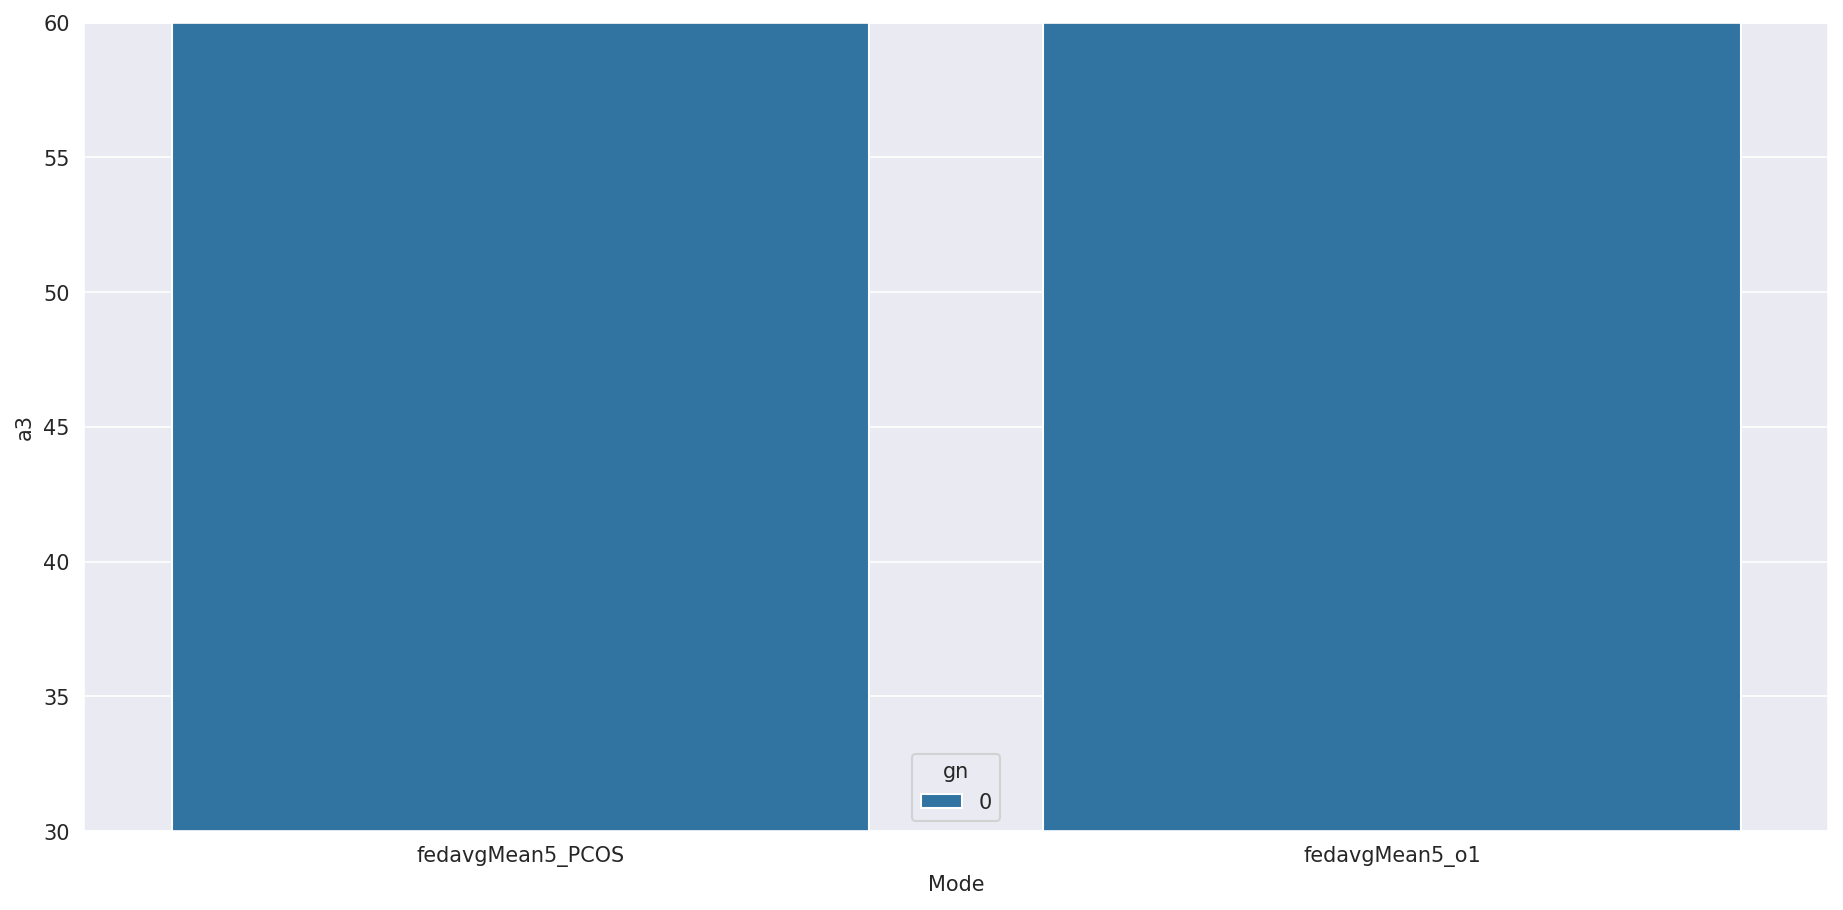

In [5]:
data_temp = load_data()

fig, axes = plt.subplots(1, 1, figsize=(15,7), dpi=150, sharey=False)
sns.set_style("darkgrid")

for ax, ap, lr in zip([axes], [0.01], [1.2]):
    temp = copy.deepcopy(data_temp)
    temp = temp[temp["act_prob"] == ap]
    # temp = temp[(temp["epoch"] == 299) | (temp["epoch"] == 599) | (temp["epoch"] == 799) | (temp["epoch"] == 999)]
    temp = temp[(temp["epoch"] == 899)]
    temp = temp[(temp["Mode"] != "fedprox") & (temp["Mode"] != "scaffold") & (temp["Mode"] != "feddynMean5") & (temp["Mode"] != "fedproxMean5")]
    temp = temp[(temp["Distribution"] == "Balanced IID partition")]
    ax = sns.barplot(data=temp, x="Mode", y="a3", hue="gn", ax=ax)
    ax.set_ylim([30,60])

../Output/CIFAR10-fedavg-G05-B0-D0-N100-P0.01__Mean5_PCOS1_ortho1-LR0.1/s1.csv
../Output/CIFAR10-fedavg-G05-B0-D0-N100-P0.01__Mean5_PCOS1_ortho1-LR0.1/s2.csv
../Output/CIFAR10-fedavg-G05-B0-D0-N100-P0.01__Mean5_PCOS1_ortho1-LR0.1/s3.csv
../Output/CIFAR10-fedavg-G00-B0-D0-N100-P0.01/s1.csv
../Output/CIFAR10-fedavg-G00-B0-D0-N100-P0.01/s2.csv
../Output/CIFAR10-fedavg-G00-B0-D0-N100-P0.01/s3.csv
../Output/CIFAR10-fedavg-G05-B0-D0.3-N100-P0.01__Mean5_ortho1-LR0.1/s4.csv
../Output/CIFAR10-fedavg-G05-B0-D0.3-N100-P0.01__Mean5_ortho1-LR0.1/s1.csv
../Output/CIFAR10-fedavg-G05-B0-D0.3-N100-P0.01__Mean5_ortho1-LR0.1/s2.csv
../Output/CIFAR10-fedavg-G05-B0-D0.3-N100-P0.01__Mean5_ortho1-LR0.1/s3.csv
../Output/CIFAR10-fedavg-G00-B0-D0.3-N100-P0.01/s1.csv
../Output/CIFAR10-fedavg-G00-B0-D0.3-N100-P0.01/s2.csv
../Output/CIFAR10-fedavg-G00-B0-D0.3-N100-P0.01/s3.csv
../Output/CIFAR10-fedavg-G05-B0-D0.3-N100-P0.01__Mean5_PCOS1_ortho1-LR0.1/s4.csv
../Output/CIFAR10-fedavg-G05-B0-D0.3-N100-P0.01__Mean5_PCO

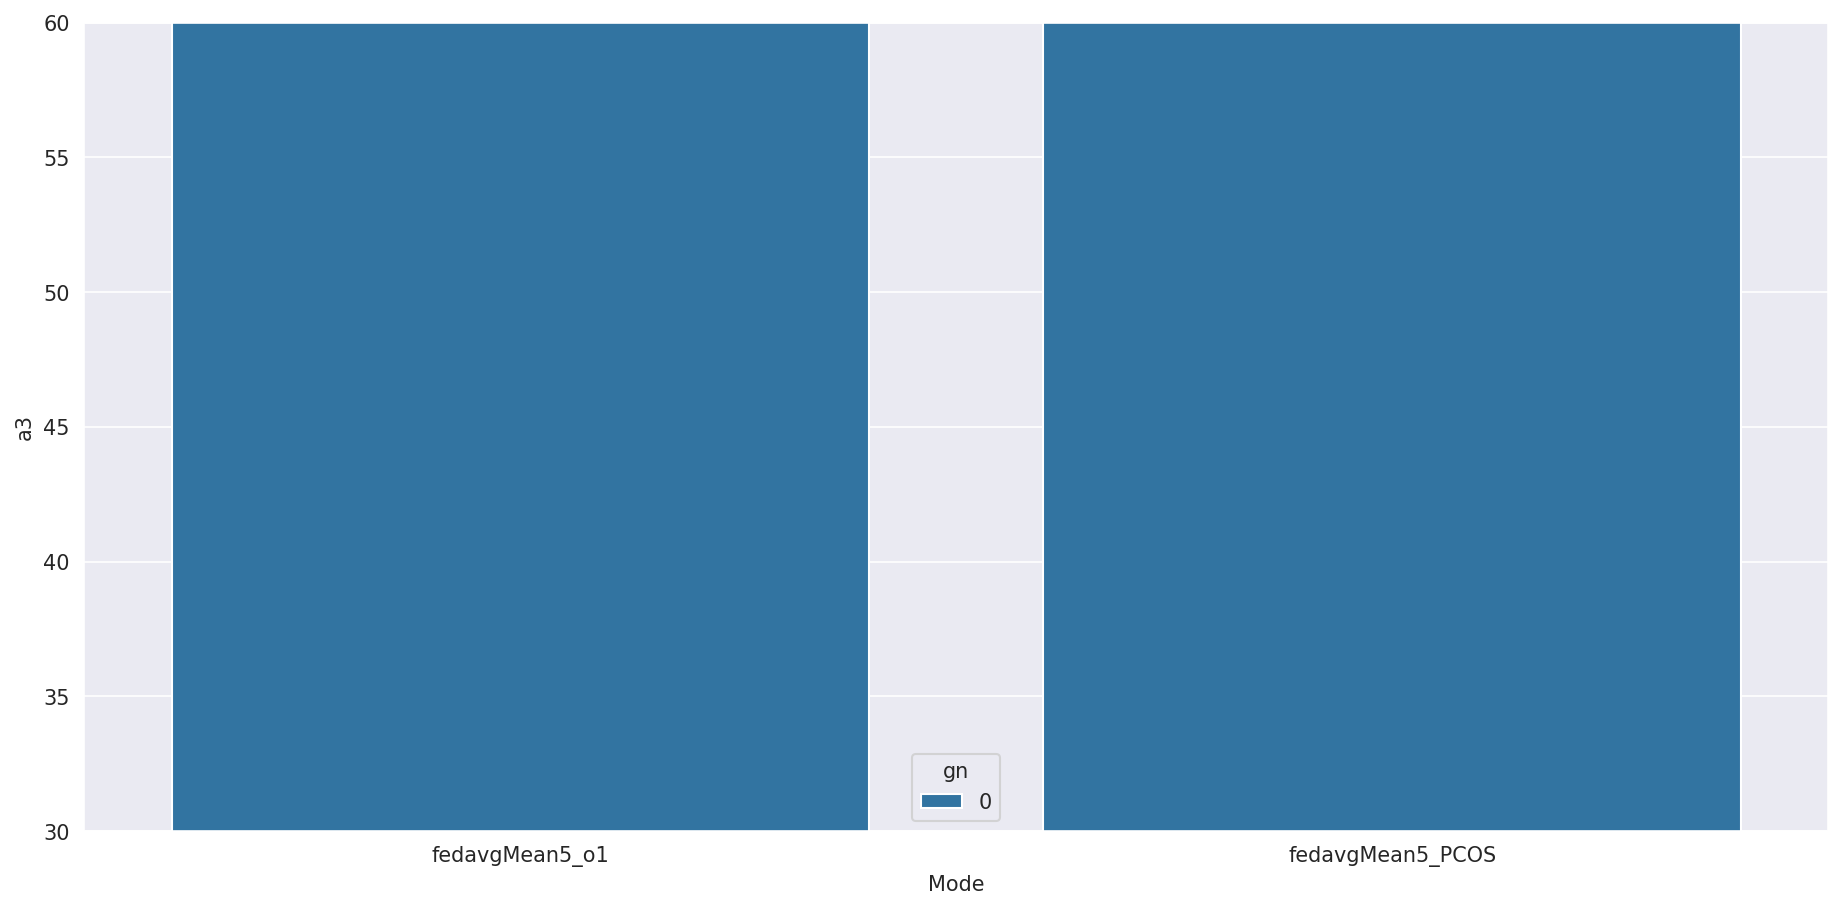

In [6]:
data_temp = load_data()

fig, axes = plt.subplots(1, 1, figsize=(15,7), dpi=150, sharey=False)
sns.set_style("darkgrid")

for ax, ap, lr in zip([axes], [0.01], [1.2]):
    temp = copy.deepcopy(data_temp)
    temp = temp[temp["act_prob"] == ap]
    # temp = temp[(temp["epoch"] == 299) | (temp["epoch"] == 599) | (temp["epoch"] == 799) | (temp["epoch"] == 999)]
    temp = temp[(temp["epoch"] == 899)]
    temp = temp[(temp["Mode"] != "fedprox") & (temp["Mode"] != "scaffold") & (temp["Mode"] != "feddynMean5") & (temp["Mode"] != "fedproxMean5")]
    temp = temp[(temp["Distribution"] != "Balanced IID partition")]
    ax = sns.barplot(data=temp, x="Mode", y="a3", hue="gn", ax=ax)
    ax.set_ylim([30,60])

In [7]:
temp

,Unnamed: 0,task,mode,gn,balance,distribution,n_clients,act_prob,seed,epoch,a1,a2,a3,a4,l1,l2,l3,l4,Mode,Distribution
89,89,CIFAR10,fedavg,0,0,0.3,100,0.01,4,899,70.78,0.73918,80.61,0.84510,0.940300,0.794235,0.577132,0.443177,fedavgMean5_o1,Balanced Dirichlet partition (α=0.3)
89,89,CIFAR10,fedavg,0,0,0.3,100,0.01,1,899,70.56,0.73912,80.49,0.84722,0.907471,0.772993,0.569376,0.436553,fedavgMean5_o1,Balanced Dirichlet partition (α=0.3)
89,89,CIFAR10,fedavg,0,0,0.3,100,0.01,2,899,72.35,0.75530,80.62,0.84536,0.872492,0.732259,0.568053,0.440687,fedavgMean5_o1,Balanced Dirichlet partition (α=0.3)
89,89,CIFAR10,fedavg,0,0,0.3,100,0.01,3,899,72.18,0.75718,80.52,0.84554,0.895276,0.737136,0.575646,0.440364,fedavgMean5_o1,Balanced Dirichlet partition (α=0.3)
89,89,CIFAR10,fedavg,0,0,0.3,100,0.01,4,899,66.62,0.70164,80.60,0.84706,1.149787,0.980358,0.571858,0.438885,fedavgMean5_PCOS,Balanced Dirichlet partition (α=0.3)
89,89,CIFAR10,fedavg,0,0,0.3,100,0.01,1,899,70.35,0.73604,80.59,0.84822,0.922706,0.790288,0.562619,0.436687,fedavgMean5_PCOS,Balanced Dirichlet partition (α=0.3)
89,89,CIFAR10,fedavg,0,0,0.3,100,0.01,2,899,67.35,0.69518,80.79,0.84680,1.162287,1.013865,0.567612,0.436549,fedavgMean5_PCOS,Balanced Dirichlet partition (α=0.3)
89,89,CIFAR10,fedavg,0,0,0.3,100,0.01,3,899,71.99,0.75082,80.67,0.84678,0.921916,0.773148,0.571597,0.436075,fedavgMean5_PCOS,Balanced Dirichlet partition (α=0.3)
